- 문제
    - 데이터에서 IQR 을 이용하여 Fare 칼럼의 이상치를 찾고
    - 이상치 데이터의 여성 수를 구하기

In [15]:
# libraries
import pandas as pd
import numpy as np

# pip install --upgrade matplotlib
import matplotlib.pyplot as plt

In [47]:
# load data
df = pd.read_csv(r'C:\Project\study-bigbungi\데이터\Titanic\train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [51]:
# Fare column
df_target = df[['Fare', 'Sex']]
df_target.head(3) # type = float

,Fare,Sex
0,7.2500,male
1,71.2833,female
2,7.9250,female


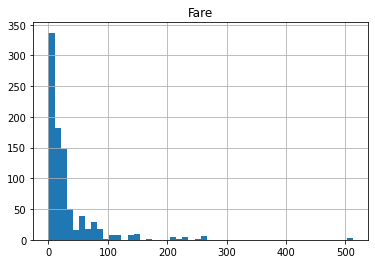

In [52]:
# EDA
df_target['Fare'].hist(bins=50)
plt.title('Fare')
plt.show()

In [53]:
# df.quantile(.25), df.quantile(.75)
Q1 = df_target['Fare'].describe()['25%']
Q3 = df_target['Fare'].describe()['75%']

# IQR
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR
print('data range :', (min, max))

data range : (-26.724, 65.6344)


In [55]:
# Outlier
outdata1 = df_target[df_target['Fare'] < min]
outdata2 = df_target[df_target['Fare'] > max]
print(len(outdata1), len(outdata2))

0 116


In [58]:
# outlier sample
outdata2.head(3)

,Fare,Sex
1,71.2833,female
27,263.0000,male
31,146.5208,female


In [62]:
# count
cnt = 0

for idx in range(len(outdata2)):

    if outdata2['Sex'].iloc[idx] == 'female':
        cnt += 1

print(f'이상치 데이터에서 여성 수 : {cnt}')

이상치 데이터에서 여성 수 : 70
